<a href="https://colab.research.google.com/github/Saishna-Shamej/Data-science/blob/main/Customer_service_request_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PACKAGES/MODULES USED : NUMPY, PANDAS MATPLOTLIB, SEABORN, DATETIME, SCIPY

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [79]:
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [80]:
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [81]:
dataset.shape

(300698, 53)

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [83]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

Columns with most of its values as null
are dropped.

Agency and Agency Name are more or less same, so I am dropping Agency Name

Dropping other unnecessary columns like Location, Incident Adrress, Street Name, X Coordinate (State Plane), Y Coordinate (State Plane) as we are already considering LATITUDE and LONGITUDE

In [84]:
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

dataset = dataset.drop(drop_columns, axis=1)

In [85]:
dataset.shape


(300698, 14)

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Status                  300698 non-null  object 
 10  Resolution Description  300698 non-null  object 
 11  Borough                 300698 non-null  object 
 12  Latitude                297158 non-null  float64
 13  Longitude               297158 non-null  float64
dtypes: float64(3), int64

# **All the null values have been removed.**

In [87]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

In [88]:
dataset = dataset[dataset['Status'] == 'Closed']

In [89]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                5903
Location Type               65
Incident Zip               507
City                       506
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1432
Longitude                 1432
dtype: int64

In [90]:
dataset = dataset.drop(['Status'], axis = 1)

In [91]:
dataset.shape

(298471, 13)

In [92]:
dataset = dataset[(dataset['Descriptor'].notnull()) & (dataset['Latitude'].notnull()) &(dataset['Longitude'].notnull())]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Resolution Description  291204 non-null  object 
 10  Borough                 291204 non-null  object 
 11  Latitude                291204 non-null  float64
 12  Longitude               291204 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 31.1+ MB


In [93]:
dataset.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              40
City                      40
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
dtype: int64

In [94]:
dataset = dataset[(dataset['Location Type'].notnull()) & (dataset['Incident Zip'].notnull())]

In [95]:
dataset.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      2
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

In [96]:
dataset.shape

(291109, 13)

# **Converting 'Created Date' and 'Closed Date' to datetime datatype**

In [98]:
cols = ['Created Date', 'Closed Date']
for col in cols:
    dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)

In [99]:
dataset['Request_Closing_Time'] = dataset[cols[1]] - dataset[cols[0]]

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291109 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291109 non-null  int64          
 1   Created Date            291109 non-null  datetime64[ns] 
 2   Closed Date             291109 non-null  datetime64[ns] 
 3   Agency                  291109 non-null  object         
 4   Complaint Type          291109 non-null  object         
 5   Descriptor              291109 non-null  object         
 6   Location Type           291109 non-null  object         
 7   Incident Zip            291109 non-null  float64        
 8   City                    291107 non-null  object         
 9   Resolution Description  291109 non-null  object         
 10  Borough                 291109 non-null  object         
 11  Latitude                291109 non-null  float64        
 12  Longitude       

# **Providing major insights/patterns that you can offer in a visual format (graphs or tables)**

In [101]:
dataset.describe()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.911090e+05,291109.000000,291109.000000,291109.000000,291109
mean,3.130158e+07,10857.971602,40.725681,-73.925035,0 days 04:18:32.241936869
std,5.753774e+05,580.282923,0.082411,0.078653,0 days 06:03:45.475942122
min,3.027948e+07,83.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.079933e+07,10314.000000,40.668926,-73.970955,0 days 01:16:30
50%,3.130675e+07,11209.000000,40.717784,-73.930774,0 days 02:42:38
75%,3.179091e+07,11238.000000,40.782973,-73.875788,0 days 05:20:25
max,3.231065e+07,11697.000000,40.912869,-73.700760,24 days 16:52:22


In [102]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [103]:
dataset['Agency'].value_counts()

NYPD    291109
Name: Agency, dtype: int64

In [104]:
dataset['Complaint Type'].value_counts()

Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4468
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

<Axes: title={'center': 'Complaint Types'}, ylabel='Count'>

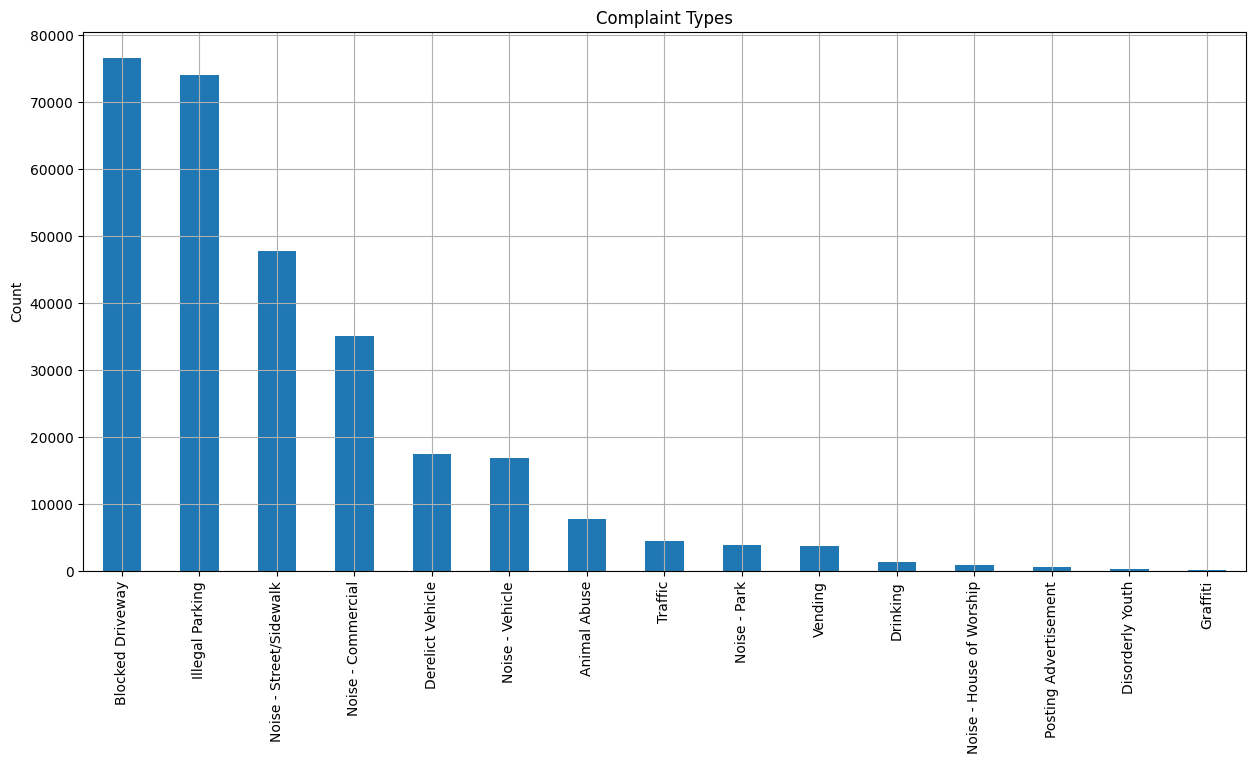

In [105]:
dataset['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 7), title='Complaint Types', ylabel='Count', grid=True)



*   so Blocked Driveway is the Maximum Complaint type followed by Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial.



In [107]:
dataset['Descriptor'].value_counts()

Loud Music/Party                  60444
No Access                         56725
Posted Parking Sign Violation     22103
Loud Talking                      21254
Partial Access                    19951
With License Plate                17506
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10930
Double Parked Blocking Traffic     5558
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4090
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2738
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           923
Tortured                            849


<Axes: title={'center': 'Top 10 Descriptors'}>

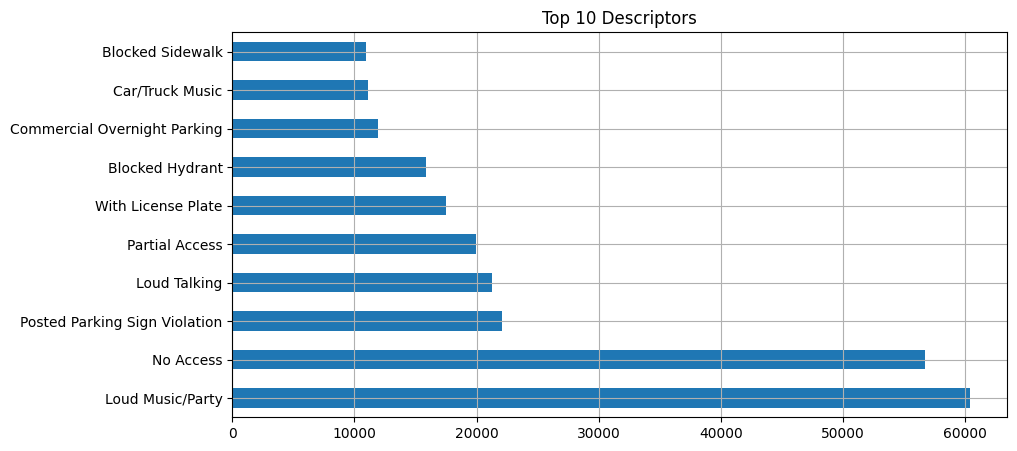

In [108]:
dataset['Descriptor'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10,5), title='Top 10 Descriptors')



* **So Loud Music/Party is the maximum descriptor for the complaints followed by No Access, Posted Parking Sign Violation and Loud Taking.**



In [109]:
dataset['Location Type'].value_counts().head(10)

Street/Sidewalk               242765
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Residential Building             226
Highway                          198
Parking Lot                      116
House and Store                   93
Name: Location Type, dtype: int64

<Axes: title={'center': 'Top 10 Location Type'}>

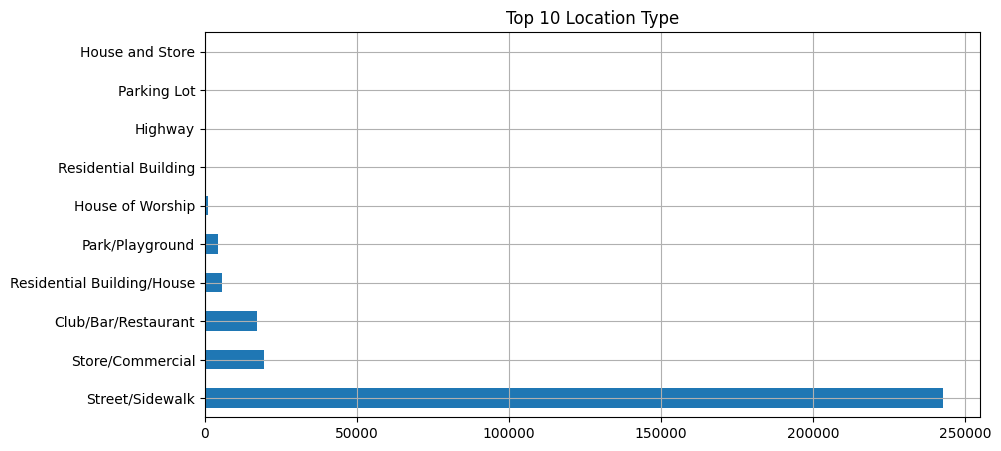

In [110]:
dataset['Location Type'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Top 10 Location Type')



*  ** So we see that the Location Type of Street/Sidewalk is a lot more than any other members of its category**



In [111]:
dataset['City'].value_counts().head(10)

BROOKLYN         96858
NEW YORK         61935
BRONX            40216
STATEN ISLAND    12211
JAMAICA           7155
ASTORIA           6254
FLUSHING          5916
RIDGEWOOD         5124
CORONA            4265
WOODSIDE          3493
Name: City, dtype: int64

Text(0.5, 0, 'Complaint Counts')

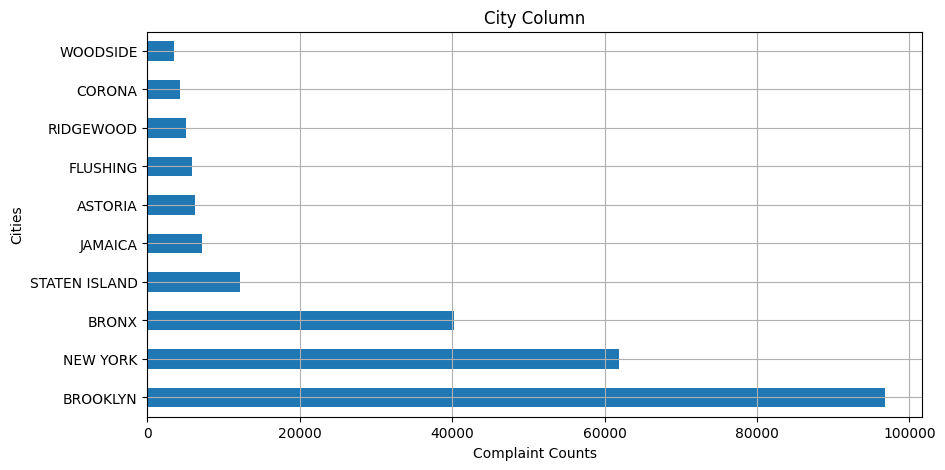

In [112]:
dataset['City'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='City Column', ylabel='Cities')
plt.xlabel('Complaint Counts')



*  ** So most complaints are from BROOKLYN followed New York, Bronx, Staten Island in City wise.**


Text(0.5, 0, 'Complaint Counts')

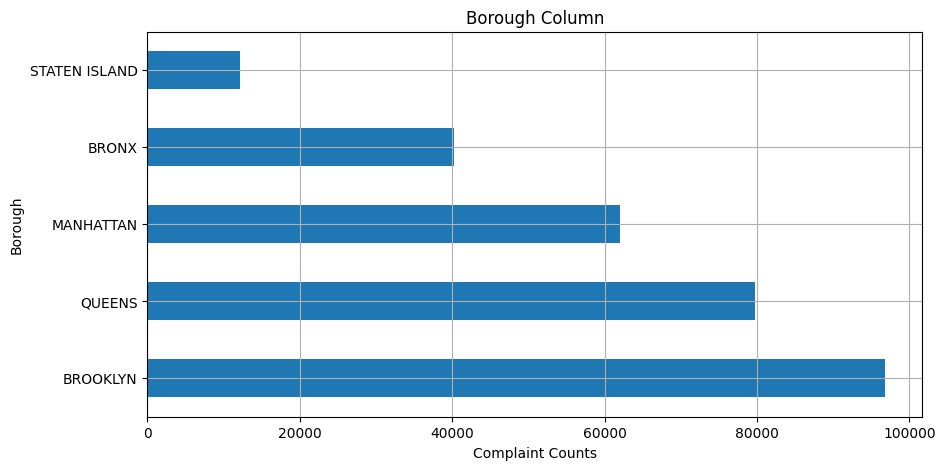

In [113]:
dataset['Borough'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Borough Column', ylabel='Borough')
plt.xlabel('Complaint Counts')

So most complaints are from BROOKLYN followed Queens, Manhattan, Bronx
and Staten Island in Borough wise.

# **Lets analyse Borough and Complaint Types**

In [114]:
top_6_complaints = dataset['Complaint Type'].value_counts()[:6].keys()
top_6_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object')

In [115]:
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,12740,7829,8864,2431,1948,3385
BROOKLYN,28119,27386,13315,11451,5164,5145
MANHATTAN,2055,11981,20362,14528,530,5374
QUEENS,31621,21944,4391,6057,8102,2608
STATEN ISLAND,2141,4881,815,677,1762,356


<ipython-input-116-c089cea8714f>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (label,col) in enumerate(borough_complaints.iteritems()):


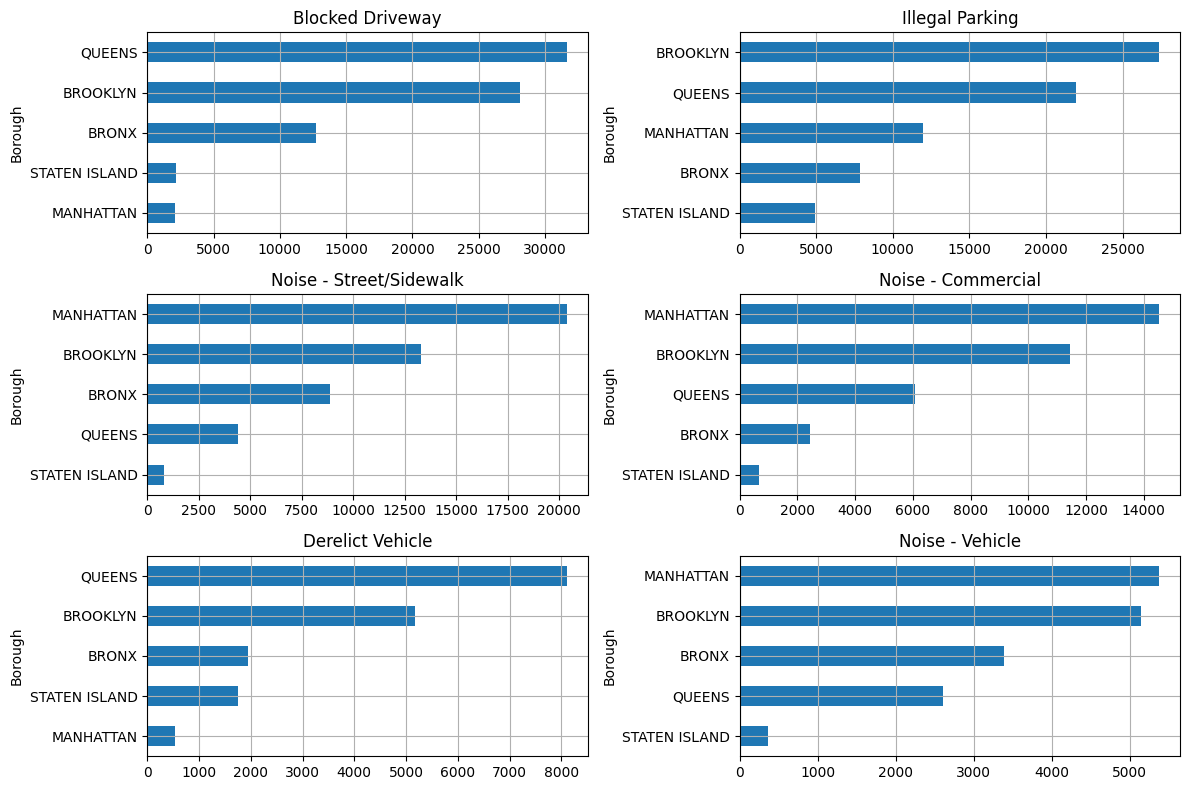

In [116]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(borough_complaints.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)

plt.tight_layout()

ANALYSIS:

- Blocked Driveway is maximum in QUEENS
- Illegal Parking is maximum in BROOKLYN
- Noise - Street/Sidewalk is maximum in MANHATTAN
- Noise - Commercial is maximum in MANHATTAN
- Derelict Vehicle is maximum in QUEENS
- Noise - Vehicle is maximum in QUEENS

Similarly for Complaints per Borough

In [117]:
top_borough = dataset['Borough'].value_counts().keys()

complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,2390,1874,1511,1412,557
Blocked Driveway,28119,31621,2055,12740,2141
Derelict Vehicle,5164,8102,530,1948,1762
Disorderly Youth,72,59,68,63,23
Drinking,257,357,294,187,175
Graffiti,43,37,22,9,2
Illegal Parking,27386,21944,11981,7829,4881
Noise - Commercial,11451,6057,14528,2431,677
Noise - House of Worship,338,297,189,79,17


<ipython-input-118-0826bb11d2d3>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (label,col) in enumerate(complaint_per_borough.iteritems()):


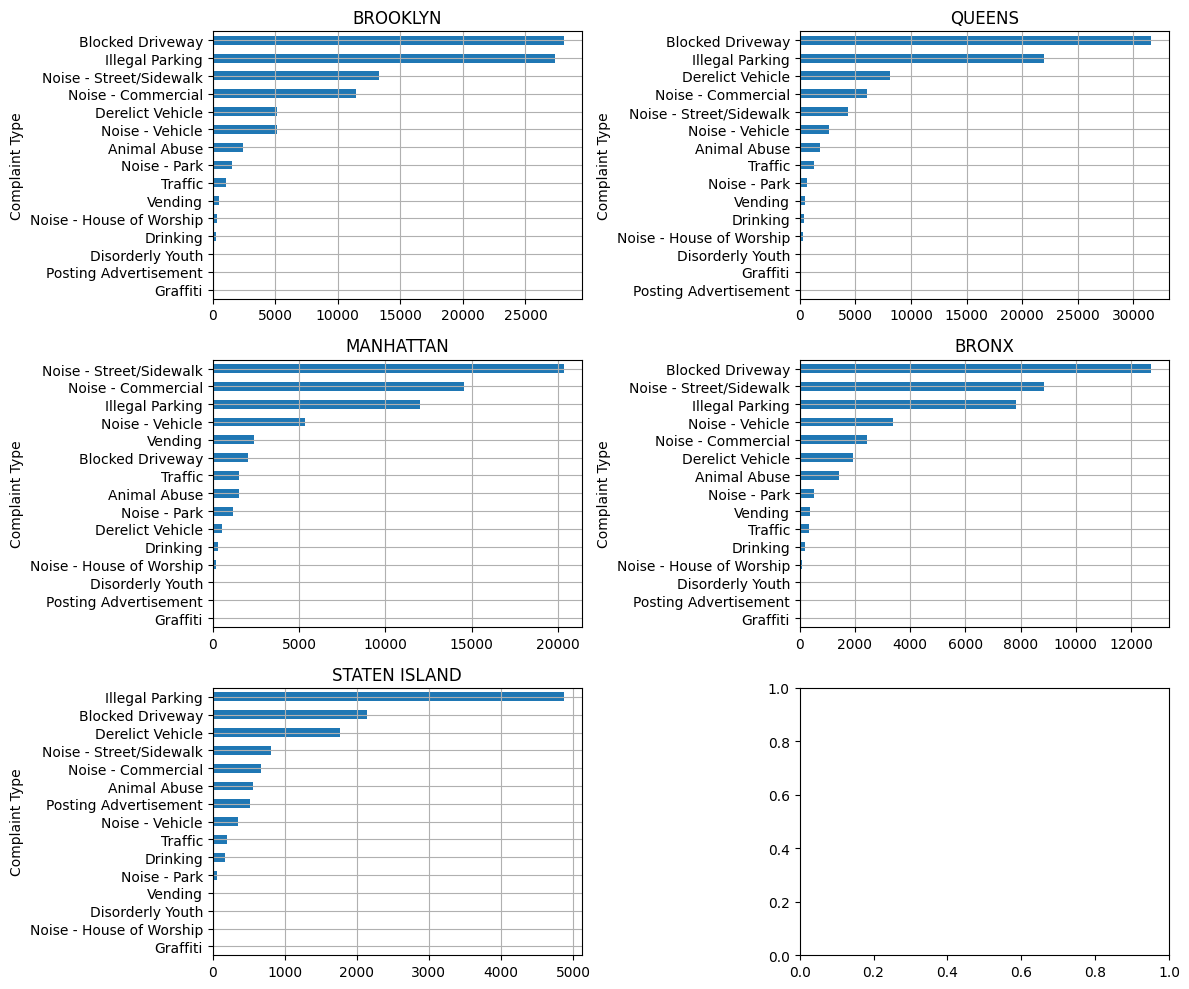

In [118]:
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,10))

for i, (label,col) in enumerate(complaint_per_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)

plt.tight_layout()

ANALYSIS:

- BROOKLYN, QUEENS and BRONX has most complaints of Blocked Driveway.
- MANHATTAN has most complaints of Noise - Street/Sidewalk.
- STATEN ISLAND has most complaints of Illegal Parking.

# **Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.**

Our data in Request_Closing_Time has format of days-hour-minute-seconds. Since calculating or operating canbe a tedious process, to make our work easier we first will convert our Request_Closing_Time from days to number of hours. This will make the data calculation or operation easier.

Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
Then we will find out the mean and standard distribution of the data.

In [119]:
dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].astype('timedelta64[h]')+1
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20)

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0
5,0 days 01:53:30,2.0
6,0 days 01:57:28,2.0
7,0 days 01:47:55,2.0
8,0 days 08:33:02,9.0
9,0 days 01:23:02,2.0


In [120]:
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                2.631579
         Blocked Driveway            3.028571
         Derelict Vehicle            3.407407
         Disorderly Youth            4.000000
         Drinking                    1.000000
         Graffiti                    2.000000
         Illegal Parking             2.827586
         Noise - Commercial          3.000000
         Noise - House of Worship    2.090909
         Noise - Park                1.500000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [121]:
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].astype('timedelta64[s]')
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,0 days 00:55:15,1.0,3315.0
1,0 days 01:26:16,2.0,5176.0
2,0 days 04:51:31,5.0,17491.0
3,0 days 07:45:14,8.0,27914.0
4,0 days 03:27:02,4.0,12422.0


In [122]:
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                 7753.052632
         Blocked Driveway             9093.485714
         Derelict Vehicle            10685.592593
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5520.000000
         Illegal Parking              8338.913793
         Noise - Commercial           8234.000000
         Noise - House of Worship     5623.909091
         Noise - Park                 4620.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64

Other analysis works on Time

In [123]:
dataset['Request_Closing_Time'].describe()

count                       291109
mean     0 days 04:18:32.241936869
std      0 days 06:03:45.475942122
min                0 days 00:01:00
25%                0 days 01:16:30
50%                0 days 02:42:38
75%                0 days 05:20:25
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [124]:
mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()

mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()

print('The mean hours is {0:.2f} hours and mean Secondsis {1:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard hours is {0:.2f} hours and standard Seconds is {1:.2f} seconds'.format(std_hrs, std_seconds))

The mean hours is 4.82 hours and mean Secondsis 15512.24 seconds
The standard hours is 6.06 hours and standard Seconds is 21825.48 seconds


# **Now analyse Complaint Types column on the basis of Months by refering to Created Date**

In [125]:
dataset['Year-Month'] = dataset['Created Date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m'))
dataset['Year-Month'].unique()

array(['2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06', '2015-05', '2015-04', '2015-03'], dtype=object)

Looks like we have incident complaints from **March** to **December**

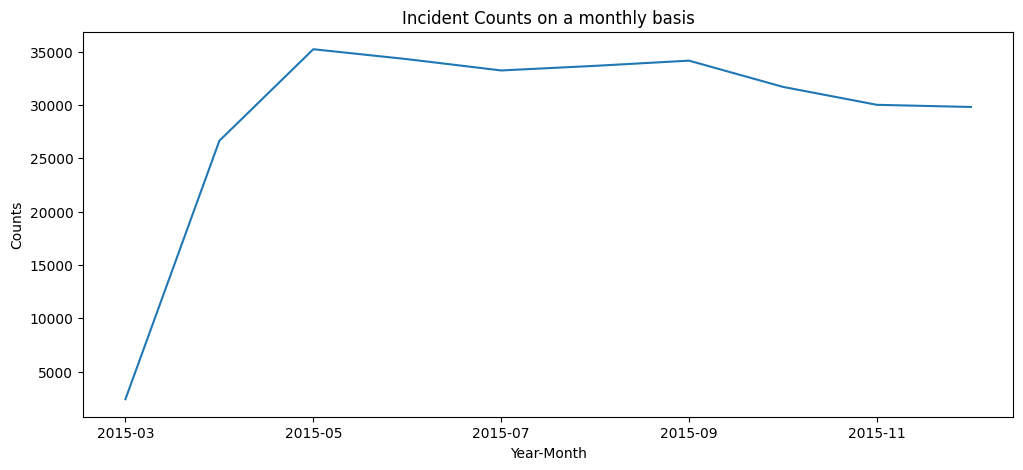

In [126]:
monthly_incidents =  dataset.groupby('Year-Month').size().plot(figsize=(12,5),
                                                               title='Incident Counts on a monthly basis', ylabel='Counts')

Are January and Ferbruary does not have any Complaints? Looks like nobody wants to go out in cold weather....

We don't have any complaints from January and Ferbruary in our dataset because we might have eliminated them as Null Values earlier.

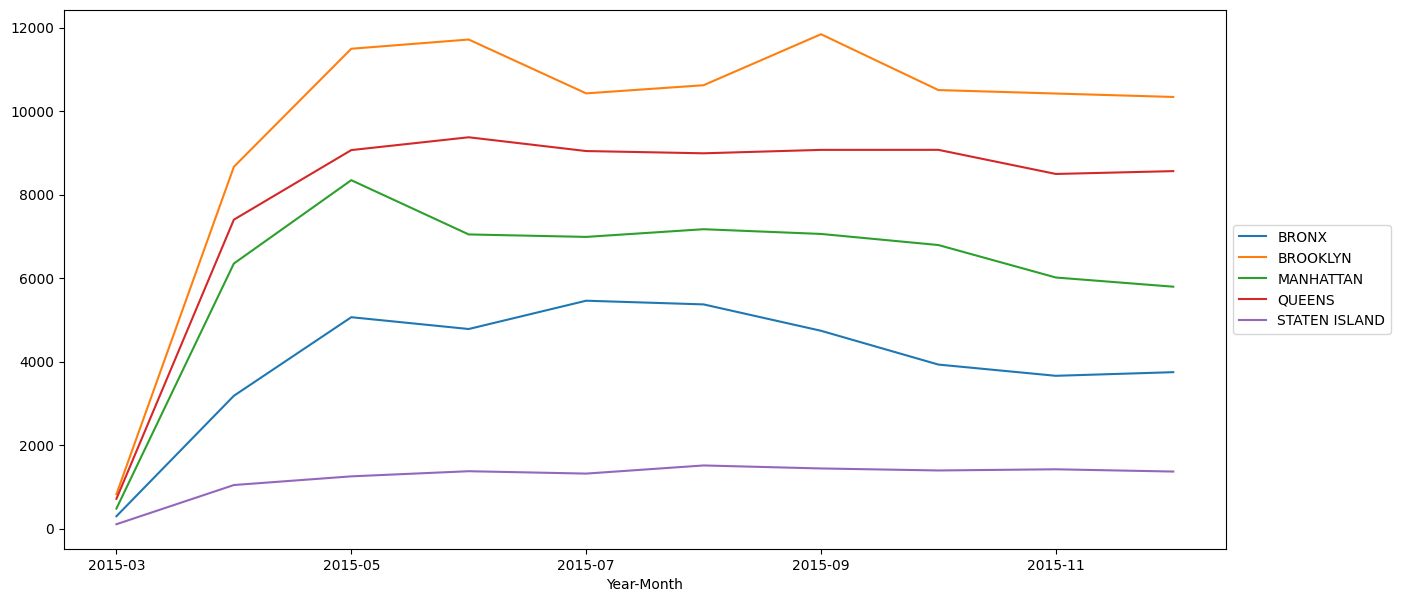

In [127]:
dataset.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

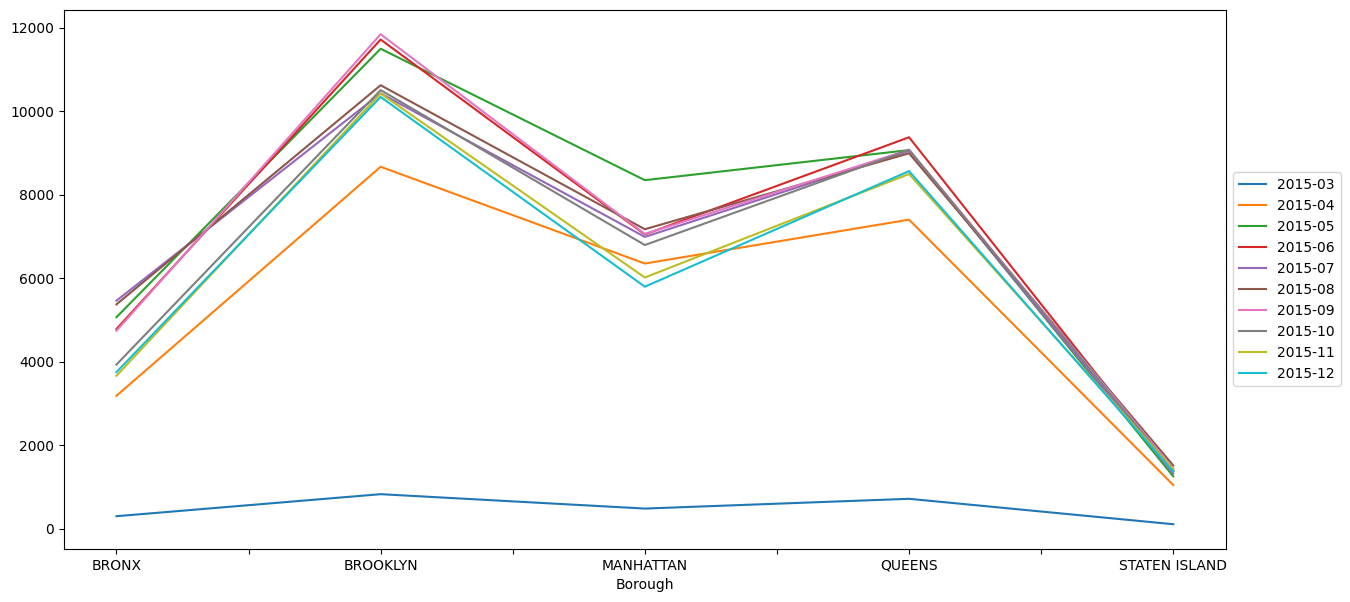

In [128]:
dataset.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

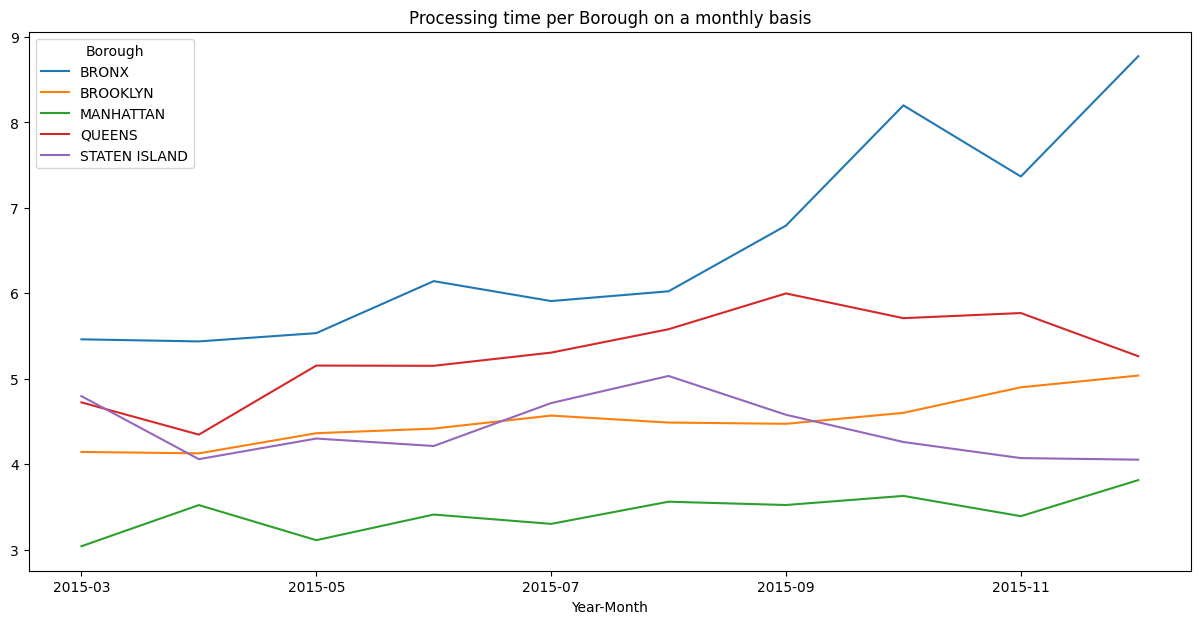

In [129]:
dataset.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

BRONX has the maximum Processing time every month even though it has the least complaints.

# **Statistical test**

In [130]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds', 'Year-Month'],
      dtype='object')

In [131]:
avg_response_time = dataset.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement        7113.582689
Noise - Commercial          11294.078335
Noise - House of Worship    11519.116304
Noise - Park                12249.610644
Noise - Street/Sidewalk     12392.210610
Traffic                     12434.687780
Disorderly Youth            12847.733333
Noise - Vehicle             12953.606711
Drinking                    13885.939370
Vending                     14442.301617
Illegal Parking             16140.427217
Blocked Driveway            17056.511751
Animal Abuse                18786.728951
Graffiti                    25744.504425
Derelict Vehicle            26450.507426
Name: Request_Closing_Time_in_Seconds, dtype: float64

# **Testing for our Hypothesis**

In [132]:
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])


In [133]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [134]:
for complaint in data.keys():
    print(data[complaint].std())

1.1029853481160972
0.9759835331364468
1.077593506458346
1.2579717580716723
1.0889851891912001
1.1764769203426566
1.2223658746794284
1.0766368282265062
1.0439938309706462
1.1124255292109824
1.1839638388454234
1.0462752311468768
1.119443436237756
1.0644915295126967
1.0383245818152778


In [135]:
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2452.471, p = 0.000
We have Different distributions (reject H0)


# **For relation between Complaint Type and Location**

In [136]:
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])

In [137]:
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ARVERNE,38,35,27,2,1,1,58,2,11,2,29,7,0,0,1
ASTORIA,125,2618,351,3,35,4,1065,1282,19,61,385,204,1,47,54
Astoria,0,116,12,0,0,0,213,261,0,0,114,0,0,0,0
BAYSIDE,37,376,198,1,1,3,511,40,2,3,15,16,0,9,2
BELLEROSE,7,95,89,2,1,0,105,37,1,1,13,10,1,7,0


In [138]:
table = city_type
stat, p, dof, expected = chi2_contingency(table)

In [139]:
print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 728
The P-Value of the Testing is 0.0: 
Expected values : 

[[5.69280711e+00 5.63664357e+01 1.28690962e+01 2.09510592e-01
  9.33608604e-01 8.30691120e-02 5.44146791e+01 2.58352290e+01
  6.76314895e-01 2.88683542e+00 3.51000079e+01 1.24000866e+01
  4.75625801e-01 3.28306774e+00 2.77362619e+00]
 [1.66368298e+02 1.64726957e+03 3.76090317e+02 6.12280021e+00
  2.72840571e+01 2.42763657e+00 1.59023086e+03 7.55016458e+02
  1.97648287e+01 8.43657418e+01 1.02577313e+03 3.62383838e+02
  1.38998306e+01 9.59453534e+01 8.10572813e+01]
 [1.90469621e+01 1.88590505e+02 4.30573500e+01 7.00979365e-01
  3.12366243e+00 2.77932169e-01 1.82060328e+02 8.64393642e+01
  2.26281058e+00 9.65875778e+00 1.17437410e+02 4.14881401e+01
  1.59134614e+00 1.09844696e+01 9.27998296e+00]
 [3.22947095e+01 3.19760995e+02 7.30050600e+01 1.18853205e+00
  5.29626563e+00 4.71242533e-01 3.08688881e+02 1.46560598e+02
  3.83666487e+00 1.63767206e+01 1.99118736e+02 7.03444163e+01
  2.69817627e+00 1.8624

In [140]:
prob = 0.95 # as aplha is considered 0.05
critical_value = chi2.ppf(prob, dof)
critical_value

791.8799091140163

In [142]:
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

alpha = 1 - prob
print('Significance : %.3f, P-Value : %.2f'%(alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 791.8799091140163, Test statistic = 105247.14233091185

Dependent (Reject H0 or Null Hypothesis)
Significance : 0.050, P-Value : 0.00
Dependent (Reject H0 or Null Hypothesis)
